# Exploratory Data Analysis on IPL Dataset
### By Vedant Thakur

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
data = pd.read_csv('IPLDataset.csv')

In [4]:
data.head()

,Match Number,Date,Venue,Team1,Team2,Toss winning team,Toss Decision,First batting team,Second batting team,First Innings Score,Overs in First innings,Second Innings Score,Overs in Second innings,Winning Team,Won By
0,63,"16th May 2023, Tuesday",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Mumbai Indians,Lucknow Super Giants,MI,bowl,LSG,MI,177/3,20.0,172/5,20.0,Lucknow Super Giants,5 runs.
1,62,"15th May 2023, Monday","Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Sunrisers Hyderabad,SRH,bowl,GT,SRH,188/9,20.0,154/9,20.0,Gujarat Titans,34 runs.
2,61,"14th May 2023, Sunday","MA Chidambaram Stadium, Chennai",Chennai Super Kings,Kolkata Knight Riders,CSK,bat,CSK,KKR,144/6,20.0,147/4,18.3,Kolkata Knight Riders,6 wickets
3,60,"14th May 2023, Sunday","Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Royal Challengers Bangalore,RCB,bat,RCB,RR,171/5,20.0,59/10,10.3,Royal Challengers Bangalore,112 runs.
4,59,"13th May 2023, Saturday","Arun Jaitley Stadium, Delhi",Delhi Capitals,Punjab Kings,DC,bowl,PBKS,DC,167/7,20.0,136/8,20.0,Punjab Kings,31 runs.


In [5]:
data.shape

(63, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match Number             63 non-null     int64  
 1   Date                     63 non-null     object 
 2   Venue                    63 non-null     object 
 3   Team1                    63 non-null     object 
 4   Team2                    63 non-null     object 
 5   Toss winning team        63 non-null     object 
 6   Toss Decision            63 non-null     object 
 7   First batting team       63 non-null     object 
 8   Second batting team      63 non-null     object 
 9   First Innings Score      63 non-null     object 
 10  Overs in First innings   63 non-null     float64
 11  Second Innings Score     62 non-null     object 
 12  Overs in Second innings  62 non-null     float64
 13  Winning Team             63 non-null     object 
 14  Won By                   62 

In [11]:
data.isnull().sum().sort_values(ascending=False)

Second Innings Score       1
Won By                     1
Overs in Second innings    1
Team1                      0
Match Number               0
Date                       0
Venue                      0
Toss Decision              0
Toss winning team          0
Team2                      0
First batting team         0
Overs in First innings     0
First Innings Score        0
Second batting team        0
Winning Team               0
dtype: int64

In [17]:
data = data.dropna()

In [19]:
data.isnull().sum()

Match Number               0
Date                       0
Venue                      0
Team1                      0
Team2                      0
Toss winning team          0
Toss Decision              0
First batting team         0
Second batting team        0
First Innings Score        0
Overs in First innings     0
Second Innings Score       0
Overs in Second innings    0
Winning Team               0
Won By                     0
dtype: int64

In [25]:
data['Date'] = pd.to_datetime(data['Date'])

ValueError: time data "2nd May 2023, Tuesday" doesn't match format "%dth %B %Y, %A", at position 13. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [26]:
def clean_date(date_str):
    return re.sub(r'(\d+)(st|th|nd|rd)',r'\1',date_str)

data['Date'] = data['Date'].apply(clean_date)

data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Vedant\AppData\Local\Temp\ipykernel_7328\461788722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(clean_date)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_7328\461788722.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


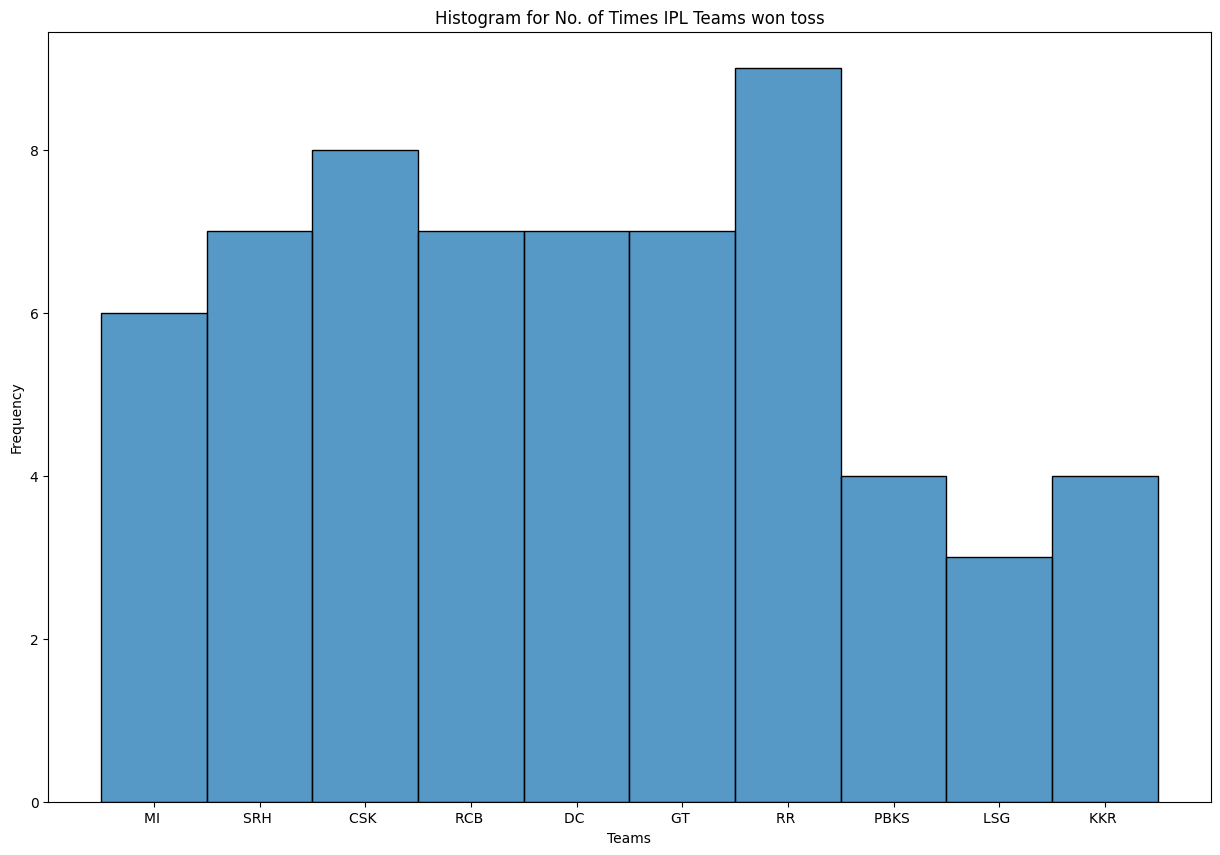

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(data['Toss winning team'])
plt.title('Histogram for No. of Times IPL Teams won toss')
plt.xlabel('Teams')
plt.ylabel('Frequency')
plt.show()

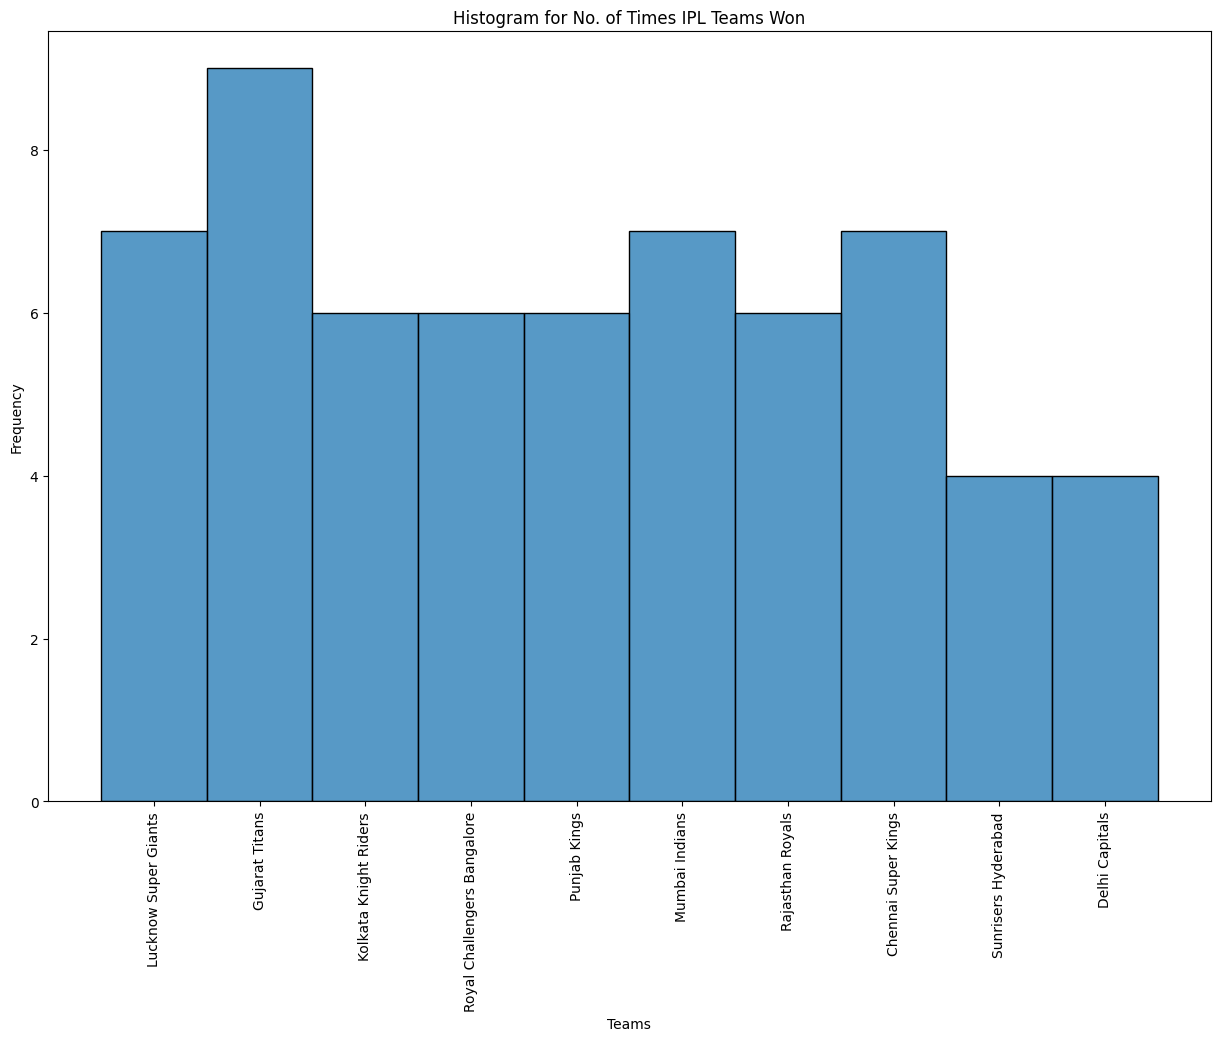

In [66]:
plt.figure(figsize=(15,10))
sns.histplot(data['Winning Team'])
plt.xticks(rotation=90)
plt.title('Histogram for No. of Times IPL Teams Won')
plt.xlabel('Teams')
plt.ylabel('Frequency')
plt.show()

In [39]:
data['Toss-Match Win'] = data['Toss winning team'] == data['Winning Team']
counts = data['Toss-Match Win'].value_counts()
labels = ['Won Toss & Match', 'Won Toss Only']
values = [counts.get(True, 0), counts.get(False, 0)]

C:\Users\Vedant\AppData\Local\Temp\ipykernel_7328\3186470585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Toss-Match Win'] = data['Toss winning team'] == data['Winning Team']


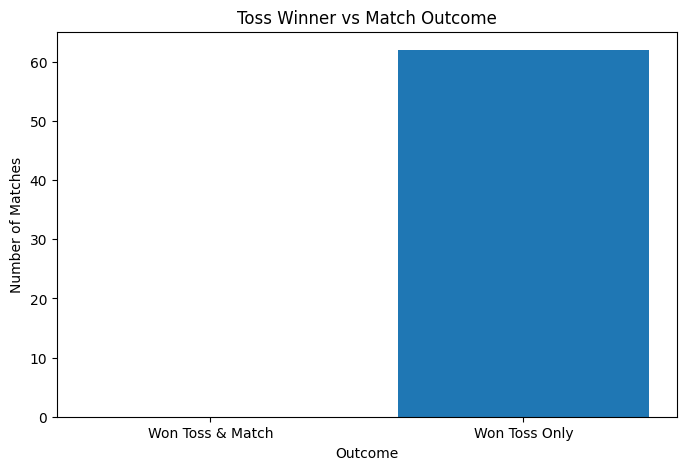

In [42]:
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Toss Winner vs Match Outcome')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()

<Figure size 800x500 with 0 Axes>

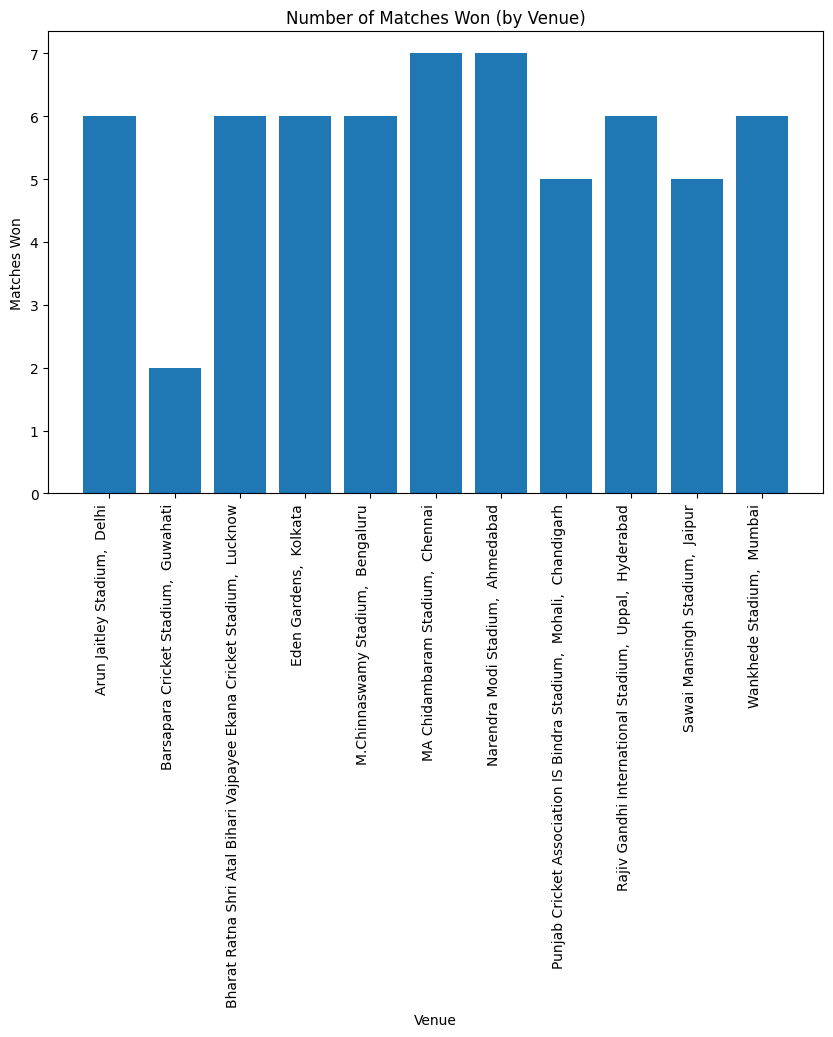

In [51]:
plt.figure(figsize=(8, 5))
win_counts = data.groupby('Venue')['Winning Team'].count()
plt.figure(figsize=(10,6))
plt.bar(win_counts.index, win_counts.values)
plt.xticks(rotation=90, ha='right')
plt.title('Number of Matches Won (by Venue)')
plt.xlabel('Venue')
plt.ylabel('Matches Won')
plt.show()

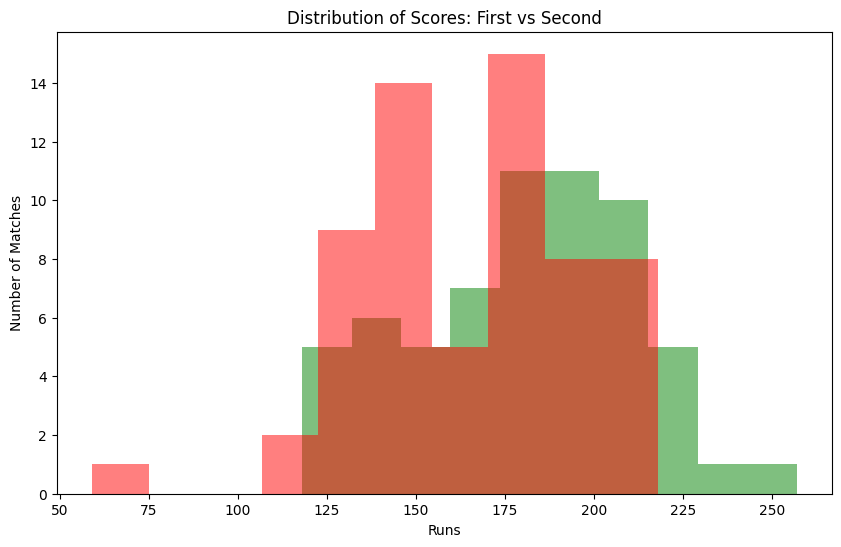

In [70]:
def extract_runs(score):
    try:
        return int(score.split('/')[0])
    except:
        return None

plt.figure(figsize=(10, 6))
plt.hist(data['First Innings Score'].apply(extract_runs), bins=10, alpha=0.5, color='green')
plt.hist(data['Second Innings Score'].apply(extract_runs), bins=10, alpha=0.5, color='red')
plt.title('Distribution of Scores: First vs Second')
plt.xlabel('Runs')
plt.ylabel('Number of Matches')
plt.show()